In [2]:
install.packages ("janitor")
install.packages("tidyverse")

Installing package into 'C:/Users/rjpra/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'janitor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rjpra\AppData\Local\Temp\RtmpqEgsA5\downloaded_packages


Installing package into 'C:/Users/rjpra/OneDrive/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rjpra\AppData\Local\Temp\RtmpqEgsA5\downloaded_packages


In [3]:
library(janitor)
library (tidyverse)



Attaching package: 'janitor'


The following objects are masked from 'package:stats':

    chisq.test, fisher.test


-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.3     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



![](C:/Users/rjpra/OneDrive/Documents/GitHub/Explore-UKDS-data/hands.jpg)

# Sex and Religion 



![hands](hands.jpg)

During the second half of the twentieth century, sexuality has become a more common medium of intimacy outside of marriage. Sexuality had been institutionalized within marriage with sex outside of marriage broadly condemned by society.  However, with the secularization of society and sexual and contraceptive revolutions, the British public has mostly separated sexual intercourse and procreation.  Views on sex, same-sex relationships, and traditional marriage have become increasingly liberal. Along with the advents of dating apps such as Tindr, the normalization of hook-up culture, attitudes towards and the stigmatization of casual sex is changing. 

Religion, if important to an individual, can be a dominant influence on sexual behavior. For example, Christianity condemns promiscuity (casual sex) and teaches that sex should exclusively take place within marriage, as the purpose is to procreate. Many fundamentalist religious beliefs maintain that sex should serve gods will; the purpose of deepening love between a married couple and procreation. However, religious identity has fallen in recent decades (52% of Brits didn’t identify with a religion (First BSA)), .  

Although most religions remain constant on their stances on sexual behaviors, the dramatic shifts in religiosity and public attitudes towards sex and casual sex leave scope for discovering how much influence religious beliefs still have on an individual’s attitudes towards sex without love.  

**Let's explore...**

# Data

The British National Surveys of Sexual Attitudes and Lifestyles (Natsal) are some of the largest and most detailed studies of sexual attitudes and behavior in the world. 

Natsal -3 is the third survey carried out by investigators which explores up to date information on sexual behaviors and the trends in sexual activity of the British population.  

The Natsal survey collects data on attitudes towards sexual relationships, including sexual relationships without love, opinions on one night stands, whether people are under too much pressure to have sex etc.   

These attitudinal variables can be analyzed in relation to other cultural and structural characteristics, such as gender, sexual identity or religion. This allows us to draw conclusions that are generalizable to the wider population which can be used to inform further research or policy making.  

Below is some code to open the dataset and print a list of the variables. 


In [20]:
setwd("C:/Users/rjpra/OneDrive/Documents/GitHub/Explore-UKDS-data/Data")
ntsl3 <- haven::read_sav("UKDA-8786-spss/spss/spss25/natsal_3_teaching_open.sav")

#turn into factors
ntsl3$religimp <- as_factor(ntsl3$religimp) 
ntsl3$snnolov <- as_factor(ntsl3$snnolov) 

# deal with missing values 
ntsl3$snnolov <-recode_factor(ntsl3$snnolov, "Don't know" = NA_character_)



How many variables are there?

In [5]:
ncol(ntsl3)
colnames (ntsl3)


[1] 20

[1] "agrp"             "rsex"             "ethnicgrpr"       "sexidr"          
 [5] "rnssecgp_6"       "adj_imd_quintile" "rwcasual"         "snnolov"         
 [9] "snpres"           "snold"            "snsexdrv"         "snmedia"         
[13] "snearly"          "attconservative"  "dage1ch"          "disabil2"        
[17] "depscr"           "religimp"         "relstatr"         "total_wt"

## How religious are we?

The survey asks those taking part about the importance of religion and religious beliefs. Let's look at the responses using a frequency table. 

*Data tip: Frequency tables are an easy way to display the distribution of data, specifically nominal and ordinal variables.*  

In [8]:
religious <- tabyl(ntsl3$religimp, sort = TRUE, show_missing_levels = FALSE, show_na = FALSE)
religious %>% 
  adorn_totals("row") %>%
  adorn_pct_formatting(digits=0)



,ntsl3$religimp,n,percent
,<chr>,<dbl>,<chr>
1,Very important,550,15%
2,Fairly important,935,25%
3,Not very important,1102,29%
4,Not important at all,1194,32%
5,Total,3781,100%



***Questions***
 
 * The most common response was ‘not important at all’. What percentage gave this response?

 * What percentage indicate religion and religious beliefs are very important?
 


The most common response was ‘not important at all’, of which 32% of people answered. The least favored response was the ‘very important’, 15 percent gave this response. 

These responses fit with other research that show less than half of the Britidh public belong to a religion [add links to Guardian and BSA report]  

# Views about sex

## Sex without love

How do we know about sexual attitudes and behaviour? 

The survey asks whether it is ok to have sex with someone without being in love with the, from this we can learn about attitudes towards sex. 





In [7]:
Sexwithoutlove <- tabyl(ntsl3$snnolov, sort = TRUE,  show_missing_levels = FALSE, show_na = FALSE)
Sexwithoutlove %>%
  adorn_totals("row") %>%
adorn_pct_formatting(digits=0)


,ntsl3$snnolov,n,percent
,<chr>,<dbl>,<chr>
1,Agree strongly,468,12%
2,Agree,1571,42%
3,Neither agree or disagree,904,24%
4,Disagree,565,15%
5,Disagree strongly,257,7%
6,Total,3765,100%


***Questions***

* What percentage agree that sex without love is OK? 
* What percetage disagree strongly that sex without love is OK?

***Answers***
* 54 percent either agree or agree strongly sex without love is ok
* 7 percent disagree strongly


So from the data here, it seems just over half the British public are comfortable with the idea of casual sex. About quarter don't give a strong opinion one way or the other and just under a quarter feel sex without love is not ok. 



### Sexually conservative attitudes

The data gives use another way to examine attitudes towards sex. In the dataset, there is a scale measuring conservative attitudes towards sex. Each respondent has a score based on their responses to a several questions about sex and sexual lifestyles. 
[add questions]

Looking at the distribution of scores for the whole sample, we find out that the average score on the sample is -0.02. 
More here....

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-3.88938 -0.67900 -0.02177 -0.01728  0.71396  2.59516      299 

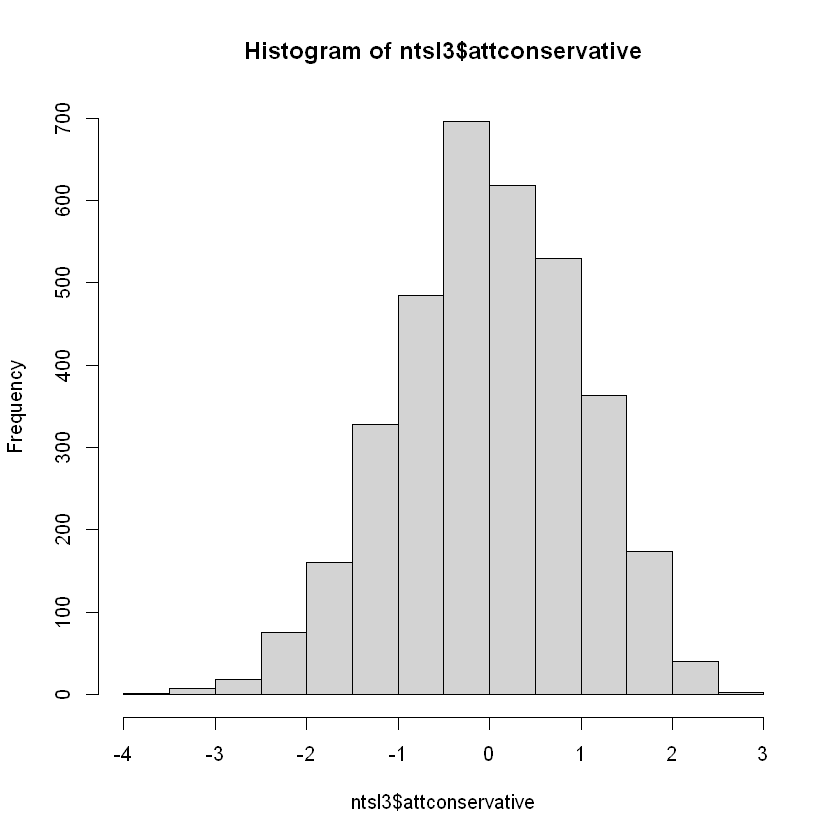

In [10]:
# produce mean score and histogram 
hist(ntsl3$attconservative)
summary(ntsl3$attconservative, na.rm = T)

***Questions***

# Does religion relate to attitudes?

We can look at the relationship between religion and attitudes. Are religious people more likely to disagree that sex without love is ok?

Running the code below will produce a table showing how the percentage of those agreeing or disagreeing varies by religiosity.

*Data tip: Two-way tables or cross-tab provide a way of analysing relationships between variables.  They can reveal associations between the subgroups in the variables.*   


In [11]:
SexReligion <- ntsl3 %>% 
  tabyl(snnolov, religimp, show_missing_levels = FALSE, show_na = FALSE)

SexReligion %>%
  adorn_percentages("col", na.rm=TRUE) %>%
  adorn_pct_formatting(digits = 0) 

snnolov,Very important,Fairly important,Not very important,Not important at all
<fct>,<chr>,<chr>,<chr>,<chr>
Agree strongly,6%,8%,13%,18%
Agree,22%,39%,49%,47%
Neither agree or disagree,20%,30%,24%,22%
Disagree,28%,17%,12%,11%
Disagree strongly,25%,6%,3%,3%


### Questions


The table shows the relationship between the participant’s opinion of whether sex without love is okay and whether they consider religious beliefs important to them.  

Overall, the cross tabulation follows the predicted pattern the more important the subject considers their religious beliefs, the less likely they were to consider that sex without love is okay.   

52.4% of those who state that their religion is very important to them either disagreed of disagreed strongly that sex without love was okay, whilst only 13% of those who considered their religion not important at all either disagreed or disagreed strongly with this statement. These findings align with existing arguments from scholars, for example, Stevens argues that religion contributes to sexually conservative attitudes and therefore the more religious people are the less likely they are to think sex without love is okay.   Religious texts such as the Bible condemn sex before marriage, and religious institution typically adhere to these texts as they value historical wisdom and the status quo. 

 

### Do those who are religious have more conservative attitudes? 

We can also compare scores using our sexually conservative attitudes scale (remember that higher scores mean more conservative attitudes. We expect religious people will have higher scores on average. Does this appear in the data? One way to examine this is to plot the means for each level of religiosity on a bar chart to see how scores vary.  


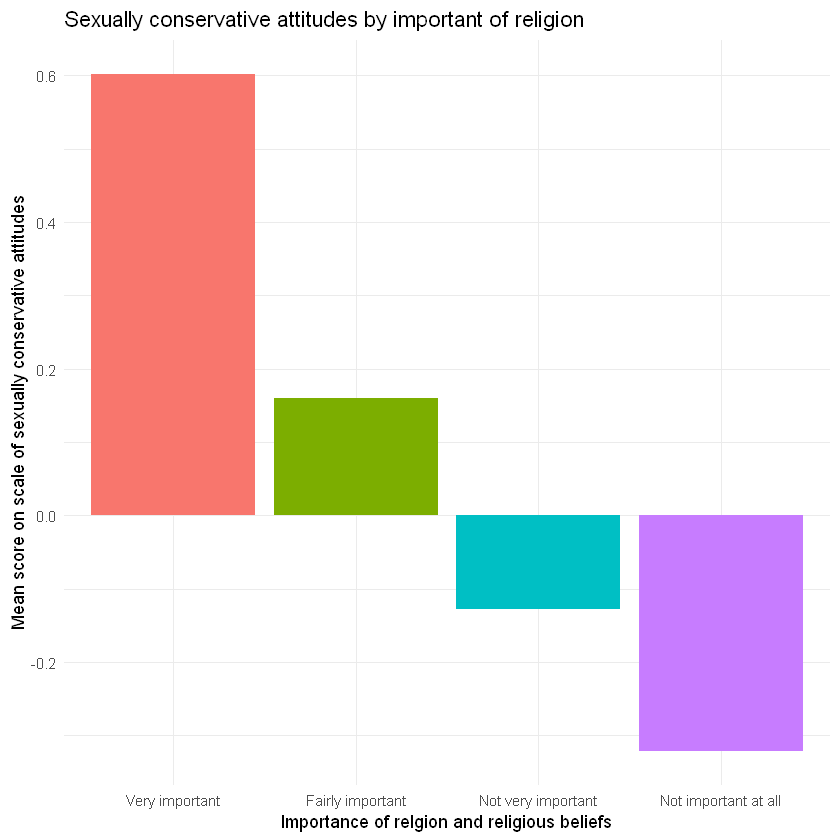

In [21]:
# Create summary data
lr_gen <- ntsl3 %>%
    group_by(religimp) %>%
  summarize(n = mean(attconservative, na.rm = T))

ggplot(data=subset(lr_gen, !is.na(religimp)), aes (x= religimp, y=n)) + 
geom_bar (aes (fill = religimp), stat ="identity") + 
theme_minimal ()+
labs(title = "Sexually conservative attitudes by important of religion") +
labs(x = "Importance of relgion and religious beliefs") +
labs (y= "Mean score on scale of sexually conservative attitudes")+
theme(legend.position = "none")


# Does it vary by gender?
* bullet point

Phillipa Brown and Jen Buckley

ERROR: Error in eval(expr, envir, enclos): object 'gj' not found
